This Notebook is used to simulate a double pendulum system using 2 mathematical models: the approximation of m1>>m2 and the exact model.

The pendulum iis composed of a first pendulum of mass m1 and length l1 attached to a fixed point, then a second pendulum of mass m2 and length l2 is attached to the mass m2.

The simulation is used to numerically analyse the double pendulum using Second Order Runge Kutta method for solving the differential equations.

This project was the first assignment developed by me to my 'Computatinal Method in Physics' class in my Physics undergraduate course at the São Paulo University Institute of Physics 

In [12]:
# Importing necessary libraries.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

Defining variables and inicial conditions:

**m1**: mass of object 1, in kg.

**m2**: mass of object 2 (coupled to object 1), in kg.

**l1**: length of rod conecting object 1 to pixed point, in meters.

**l2**: length of rod conecting object 1 to pixed point, in meters.

**E**: energy input in the system (function of theta1_p0), in Joules.

**g**: local gravity acceleration, in m.s^-2.

**theta1_0**: inicial position of object 1, in rad.

**theta2_0**: inicial position of object 2, in rad.

**theta1_p0**: inicial momentum of object 1, in kg.m^2.s^-1. Function of inicial energy E.

**theta2_p0**: inicial momentum of object 2, in kg.m^2.s^-1.

**Tf**: final tmestamp, in seconds, starting from t=0.

**h**: timestep, in seconds.

**Nt**: number of timestep calculated from the choice of Tf and h.

In [13]:
m1 = 0.1
m2 = 0.005
l1 = 0.5
l2 = 0.2
E = 0.1
g = 10
theta1_0 = 0
theta2_0 = 1.5708
theta2_p0 = 0
theta1_p0 = 0.09752

Tf = 10
h = 0.01
Nt = np.size(np.arange(0.0,Tf+h,h))

Defining the vector function *pendulo_aprox* for the pundulum position and momentum for the approximate model.

Receives a position vector in phase space as function of t => **x**

Returns the time derivative of the X vector => **a**

x[theta1,theta2,p1,p2]

a[d/dt (theta1),
  d/dt (theta2),
  d/dt (p1),
  d/dt (p2)]

In [14]:
def pendulo_aprox(x):
  a = np.array([.0,.0,.0,.0])
  a[0] = (x[2]/(m1*(l1**2)))-((x[3]*np.cos(x[0]-x[1]))/(m1*l1*l2))
  a[1] = (x[3]/(m2*(l2**2)))-((x[2]*np.cos(x[0]-x[1]))/(m1*l1*l2))
  a[2] = (-m1*g*l1*np.sin(x[0]))-((x[2]*x[3]*np.sin(x[0]-x[1]))/(m1*l1*l2))
  a[3] = (-m2*g*l2*np.sin(x[1]))+((x[2]*x[3]*np.sin(x[0]-x[1]))/(m1*l1*l2))
  return a

Defining the vector function **pendulo_comp** for the pundulum position and momentum for the exact model.

Receives a position vector in phase space as function of t => **x**

Returns the time derivative of the X vector => **a**

x[theta1,theta2,p1,p2]

a[d/dt (theta1),
  d/dt (theta2),
  d/dt (p1),
  d/dt (p2)]

In [15]:
def pendulo_comp(x):
  a = np.array([.0,.0,.0,.0])
  a[0] = ((l2*x[2])-(l1*x[3]*np.cos(x[0]-x[1])))/(l2*(l1**2)*(m1+(m2*(np.sin(x[0]-x[1])**2))))
  a[1] = ((-l2*x[2]*np.cos(x[0]-x[1]))+(l1*(1+(m1/m2))*x[3]))/(l1*(l2**2)*(m1+(m2*(np.sin(x[0]-x[1])**2))))
  A = (x[2]*x[3]*np.sin(x[0]-x[1]))/(l1*l2*(m1+(m2*(np.sin(x[0]-x[1])**2))))
  B = ((((l2**2)*(m2)*(x[2]**2))+((l1**2)*(m1+m2)*(x[3]**2))-(l1*l2*m2*x[2]*x[3]*np.cos(x[0]-x[1])))/(2*(l1**2)*(l2**2)*((m1+(m2*(np.sin(x[0]-x[1])**2)))**2)))*(np.sin(2*(x[0]-x[1])))
  a[2] = -(m1+m2)*g*l1*np.sin(x[0]) - A + B
  a[3] = -m2*g*l2*np.sin(x[1]) + A - B
  return a

Defining the function for the Second Order Runge Kutta method.

The parameter **f** is a named function which chooses the mathematical equation system to be solved.:

For the exact solution *f=pendulo_comp*, for the approximate solution *f=pendulo_aprox*.

X_t: matrix with 4xNt elements. A collection of the phase space positions at each timestep.

Sec: collection of the transition points for the Poincaré Section.

X: phase space position vector under transformation X(tn) => X(tn+1).

X_meio: X vector at half step.

k1 and k2: vectors used in the Runge-Kutta calculations.

In [16]:
def RK2(f):
  X_t = [[theta1_0,theta2_0,theta1_p0,theta2_p0]]
  Sec = []
  for t in range(Nt-1):
    X = np.array(X_t[t])
    k1 = f(X)*h
    X_meio = X+k1/2
    k2 = f(X_meio)*h
    X = X+k2
    # The lines below normalize the angular positions to the interval 0 to 2pi
    if (X[0] > np.pi):
      X[0] = X[0] - 2*np.pi
    if (X[0] < -np.pi):
      X[0] = X[0] - 2*np.pi
    if (X[1] > np.pi):
      X[1] = X[1] - 2*np.pi
    if (X[1] < -np.pi):
      X[1] = X[1] + 2*np.pi
    if (X_t[-1][1] < 0 and X[1] > 0):
      Sec.append(X)
    X_t.append(X)
  return np.array(X_t), np.array(Sec)

Solve for the approximate model:

X_t_aprox: Nt collection of the phase space vector positions.
Sec_aprox: Poincaré Section points.

In [17]:
X_t_aprox, Sec_aprox = RK2(pendulo_aprox)
# prints the values of the solution. For Verification.
print(X_t_aprox) 
X_T_aprox = np.transpose(X_t_aprox)
Sec_T_aprox = np.transpose(Sec_aprox)

[[ 0.00000000e+00  1.57080000e+00  9.75200000e-02  0.00000000e+00]
 [ 3.90089749e-02  1.56639847e+00  9.74176111e-02 -9.51249270e-05]
 [ 7.79446287e-02  1.55282113e+00  9.71116637e-02 -1.81479628e-04]
 ...
 [-7.39483695e-01  3.01801986e-01 -5.81877607e-02  4.37708222e-04]
 [-7.62294277e-01  3.50196634e-01 -5.47966714e-02  4.27154525e-04]
 [-7.83699730e-01  3.93081157e-01 -5.13243362e-02  4.11053336e-04]]


Plot the Phase space graphs and the Poincaré Section for the approximate model.

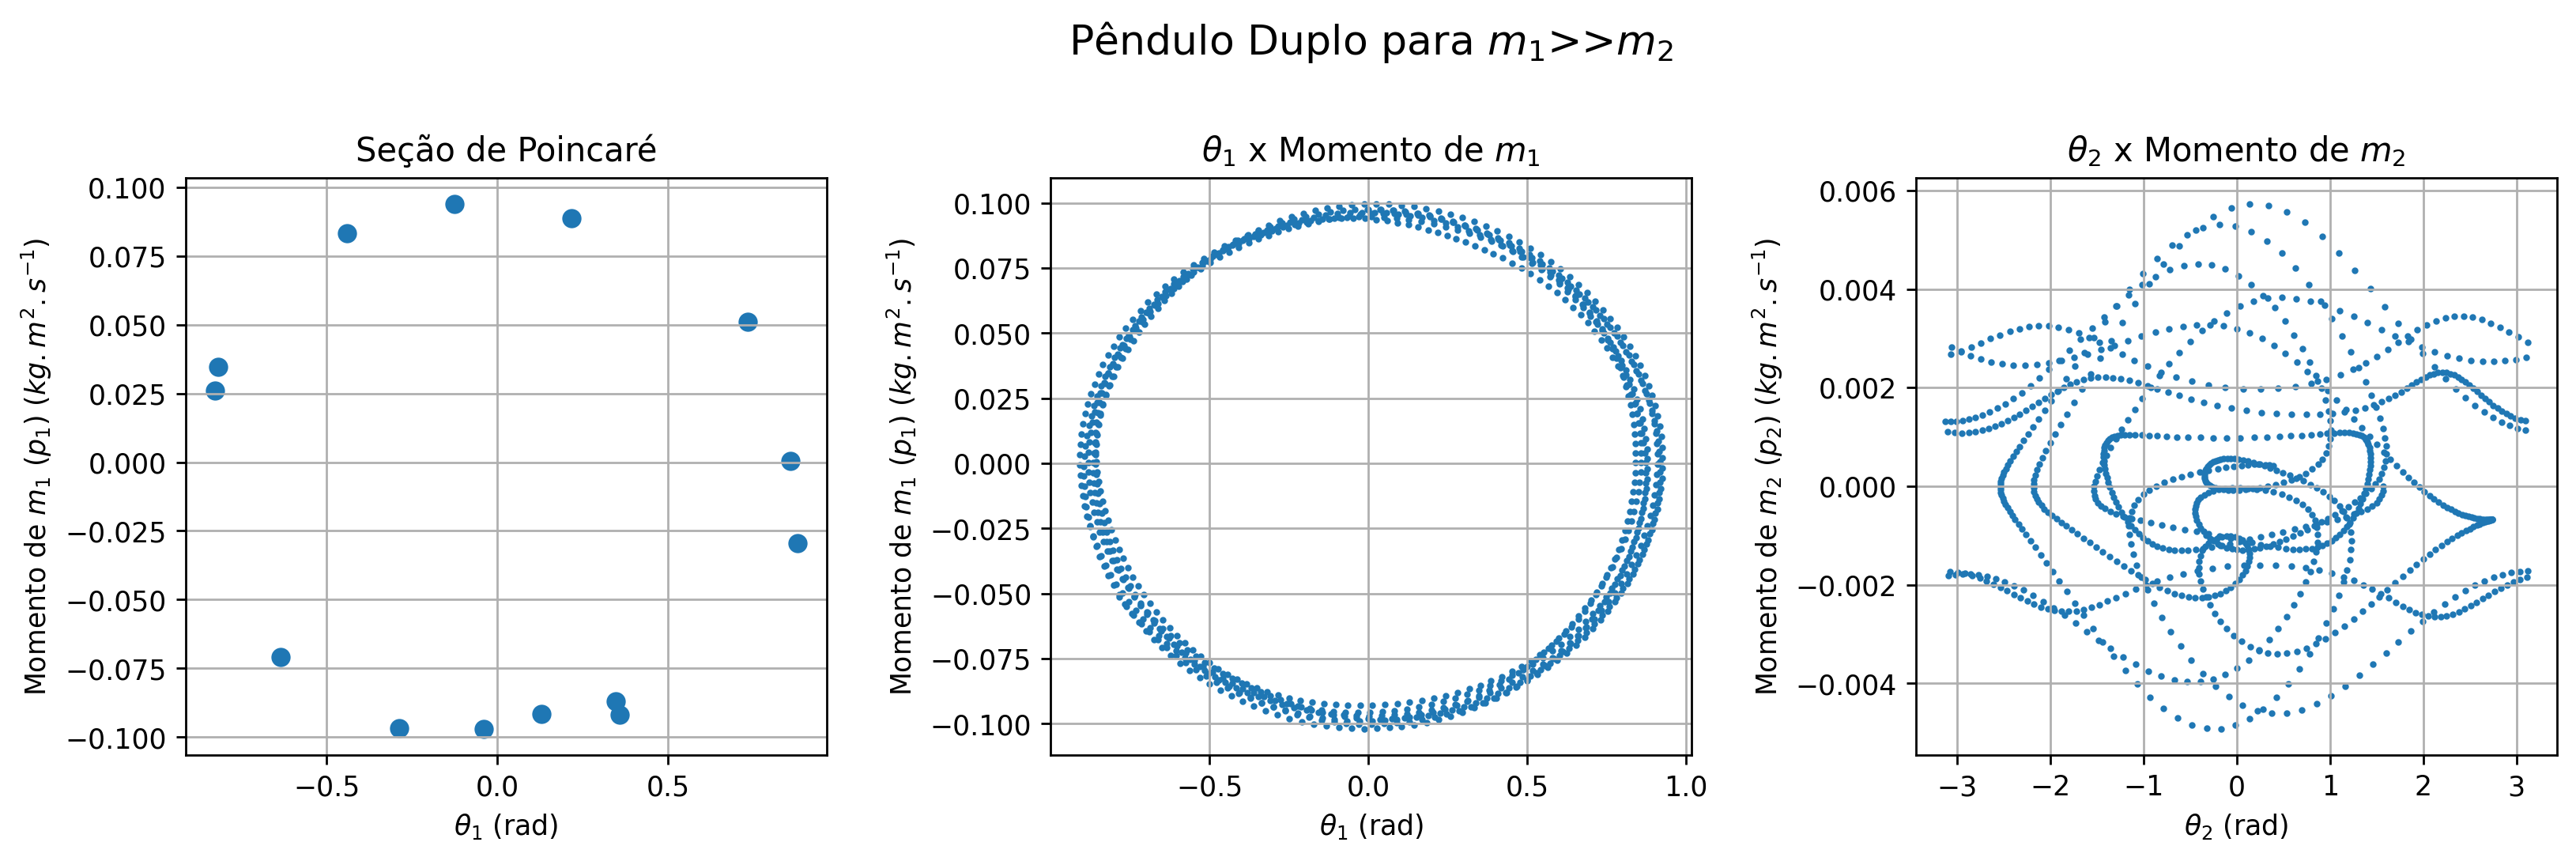

In [18]:
fig_aprox, ax_aprox = plt.subplots(1, 3, figsize=(12, 4),dpi=250)
plt.suptitle('Pêndulo Duplo para $m_{1}$>>$m_{2}$', fontsize=15, y=1.2)
plt.subplots_adjust(left=0, right=1, top=1.0, bottom= 0.27, wspace= 0.35, hspace=0.3)
ax_aprox[0].scatter(Sec_T_aprox[0], Sec_T_aprox[2], label='m1>>m2')
ax_aprox[0].set_title('Seção de Poincaré')
ax_aprox[0].set_xlabel(r'$\theta_{1}$ (rad)')
ax_aprox[0].set_ylabel(r'Momento de $m_{1}$ ($p_{1}$) ($kg.m^{2}.s^{-1}$)')
ax_aprox[0].grid()
ax_aprox[1].scatter(X_T_aprox[0], X_T_aprox[2], s=2, label='m1>>m2')
ax_aprox[1].set_title(r'$\theta_{1}$ x Momento de $m_{1}$')
ax_aprox[1].set_xlabel(r'$\theta_{1}$ (rad)')
ax_aprox[1].set_ylabel(r'Momento de $m_{1}$ ($p_{1}$) ($kg.m^{2}.s^{-1}$)')
ax_aprox[1].grid()
ax_aprox[2].scatter(X_T_aprox[1], X_T_aprox[3], s=2, label='m1>>m2')
ax_aprox[2].set_title(r'$\theta_{2}$ x Momento de $m_{2}$')
ax_aprox[2].set_xlabel(r'$\theta_{2}$ (rad)')
ax_aprox[2].set_ylabel(r'Momento de $m_{2}$ ($p_{2}$) ($kg.m^{2}.s^{-1}$)')
ax_aprox[2].grid()

Solve for the exact model:

X_t_comp: Nt collection of the phase space vector positions.
Sec_comp: Poincaré Section points.

In [19]:
X_t_comp, Sec_comp = RK2(pendulo_comp)
# prints the values of the solution. For Verification.
print(X_t_comp[:])
X_T_comp = np.transpose(X_t_comp)
Sec_T_comp = np.transpose(Sec_comp)

[[ 0.00000000e+00  1.57080000e+00  9.75200000e-02  0.00000000e+00]
 [ 3.71519707e-02  1.56657517e+00  9.74146390e-02 -9.21533982e-05]
 [ 7.42376430e-02  1.55391507e+00  9.70988856e-02 -1.68725140e-04]
 ...
 [-7.48272910e-01  1.72889887e-01  3.07963989e-02 -3.23625352e-03]
 [-7.33484120e-01 -1.20152611e-02  3.42430943e-02 -3.14583347e-03]
 [-7.16862909e-01 -2.00715101e-01  3.76379410e-02 -3.04623857e-03]]


Plot the Phase space graphs and the Poincaré Section for the exact model.

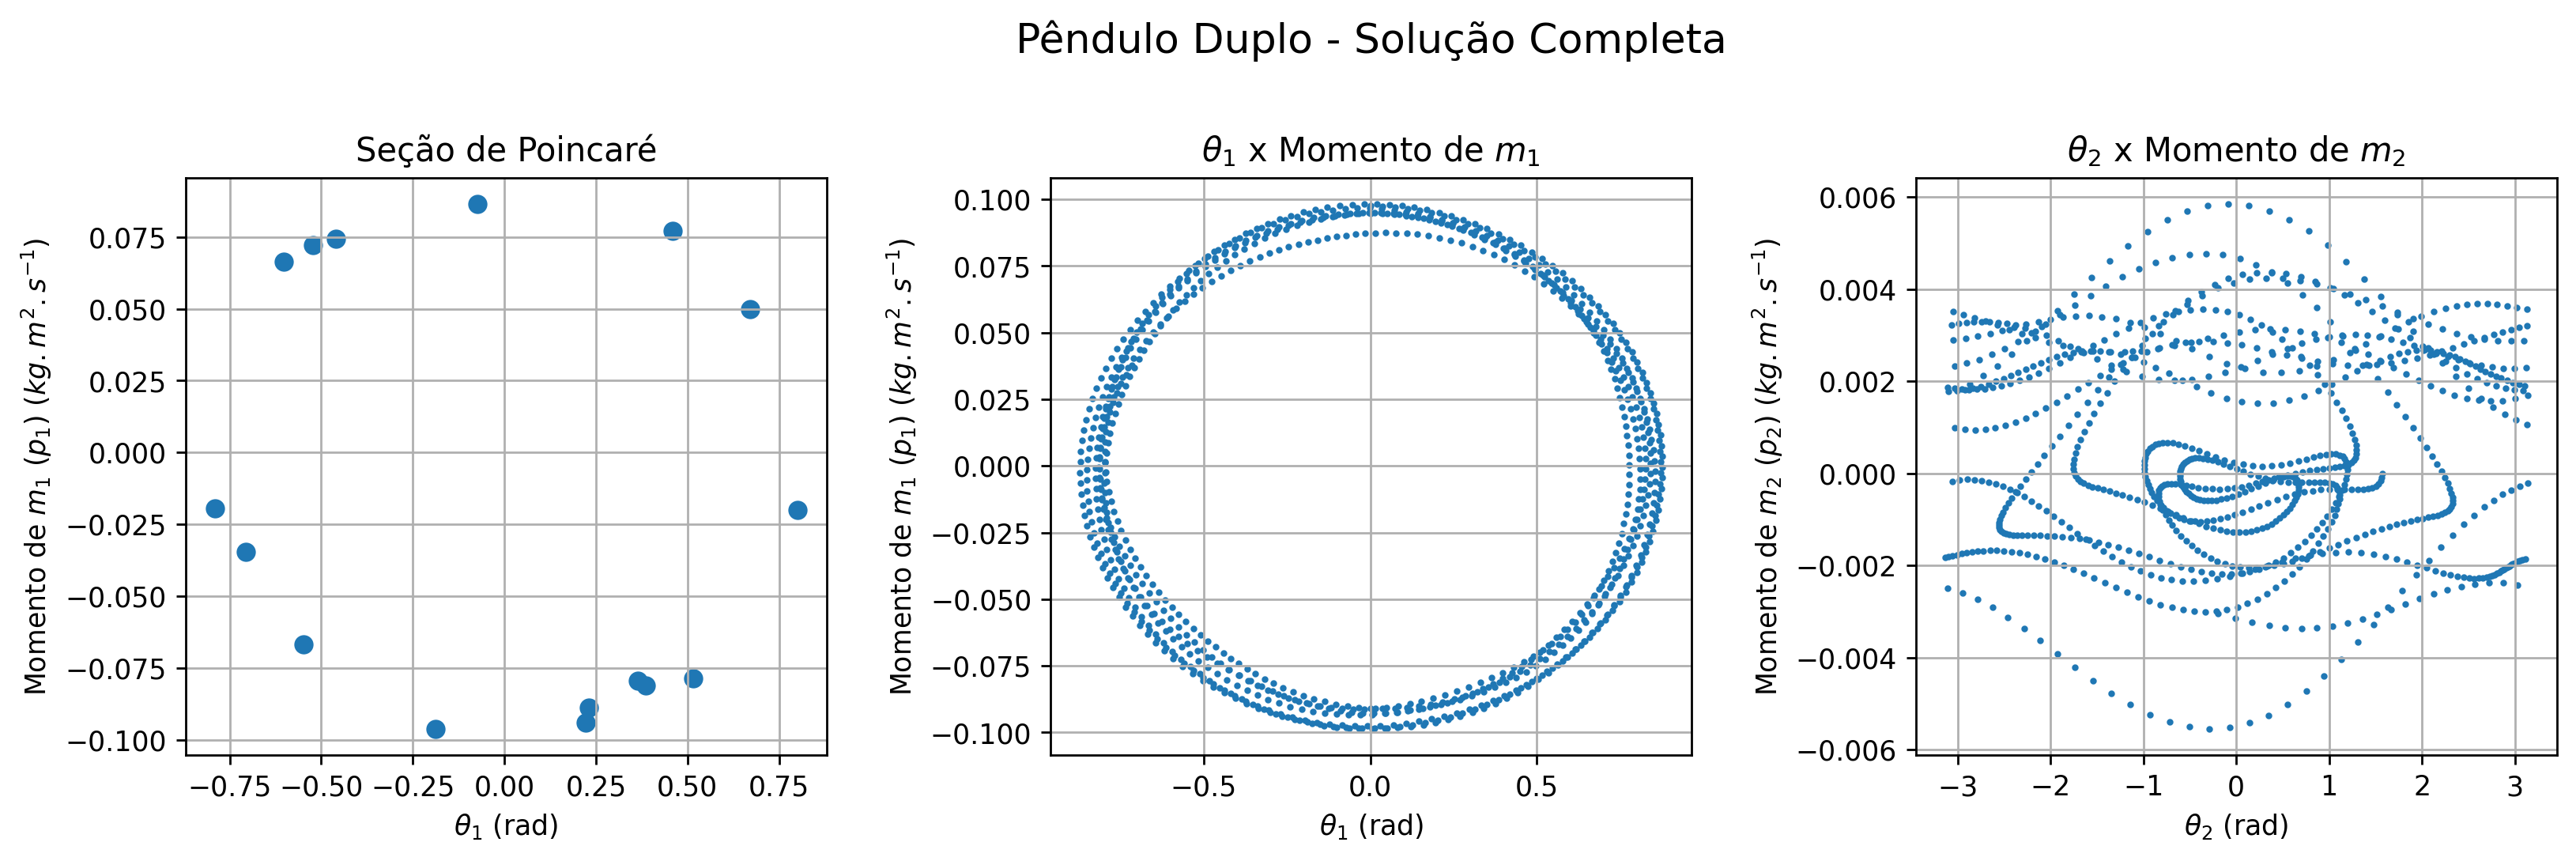

In [20]:
fig_comp, ax_comp = plt.subplots(1, 3, figsize=(12, 4),dpi=250)
plt.suptitle('Pêndulo Duplo - Solução Completa', fontsize=15, y=1.2)
plt.subplots_adjust(left=0, right=1, top=1.0, bottom= 0.27, wspace= 0.35, hspace=0.3)
ax_comp[0].scatter(Sec_T_comp[0], Sec_T_comp[2], label='completo')
ax_comp[0].set_title('Seção de Poincaré')
ax_comp[0].set_xlabel(r'$\theta_{1}$ (rad)')
ax_comp[0].set_ylabel(r'Momento de $m_{1}$ ($p_{1}$) ($kg.m^{2}.s^{-1}$)')
ax_comp[0].grid()
ax_comp[1].scatter(X_T_comp[0], X_T_comp[2], s=2, label='completo')
ax_comp[1].set_title(r'$\theta_{1}$ x Momento de $m_{1}$')
ax_comp[1].set_xlabel(r'$\theta_{1}$ (rad)')
ax_comp[1].set_ylabel(r'Momento de $m_{1}$ ($p_{1}$) ($kg.m^{2}.s^{-1}$)')
ax_comp[1].grid()
ax_comp[2].scatter(X_T_comp[1], X_T_comp[3], s=2, label='completo')
ax_comp[2].set_title(r'$\theta_{2}$ x Momento de $m_{2}$')
ax_comp[2].set_xlabel(r'$\theta_{2}$ (rad)')
ax_comp[2].set_ylabel(r'Momento de $m_{2}$ ($p_{2}$) ($kg.m^{2}.s^{-1}$)')
ax_comp[2].grid()

Plot the temporal evolution of the angular position of the masses.

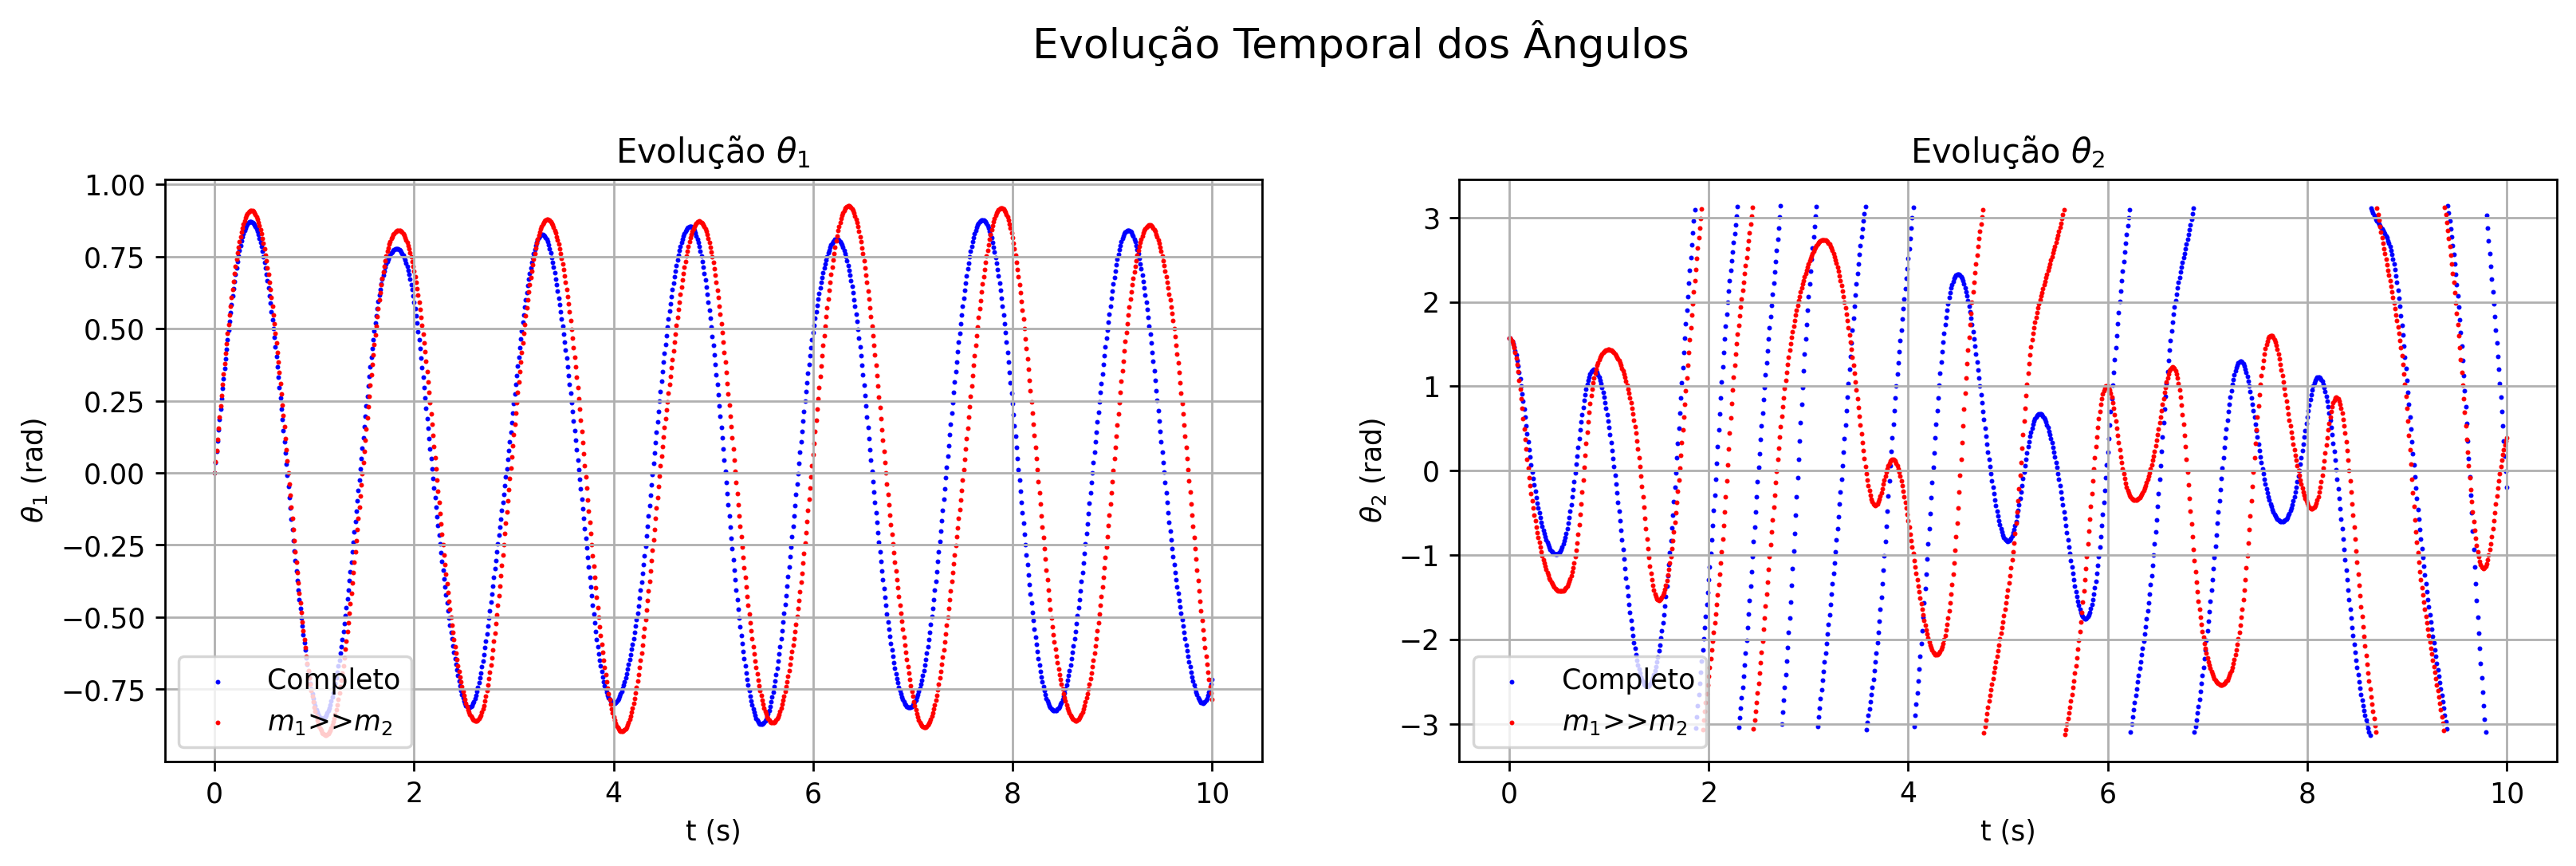

In [21]:
fig_temporal, ax_temporal = plt.subplots(1,2, figsize=(12, 4),dpi=250)
plt.suptitle('Evolução Temporal dos Ângulos', fontsize=15, y=1.2)
plt.subplots_adjust(left=0, right=1, top=1.0, bottom= 0.27, wspace= 0.18, hspace=0.3)
ax_temporal[0].scatter(np.arange(0.0,Tf+h,h), X_T_comp[0], s=2, marker='.', c='blue', label='Completo')
ax_temporal[0].scatter(np.arange(0.0,Tf+h,h), X_T_aprox[0], s=2, marker='.', c='red', label='$m_{1}$>>$m_{2}$')
ax_temporal[0].set_title(r'Evolução $\theta_{1}$')
ax_temporal[0].set_xlabel(r't (s)')
ax_temporal[0].set_ylabel(r'$\theta_{1}$ (rad)')
ax_temporal[0].legend(loc='lower left')
ax_temporal[0].grid()
ax_temporal[1].scatter(np.arange(0.0,Tf+h,h), X_T_comp[1], s=2, marker='.', c='blue', label='Completo')
ax_temporal[1].scatter(np.arange(0.0,Tf+h,h), X_T_aprox[1], s=2, marker='.', c='red', label='$m_{1}$>>$m_{2}$')
ax_temporal[1].set_title(r'Evolução $\theta_{2}$')
ax_temporal[1].set_xlabel(r't (s)')
ax_temporal[1].set_ylabel(r'$\theta_{2}$ (rad)')
ax_temporal[1].legend(loc='lower left')
ax_temporal[1].grid()

Plot the graphs for mass variation on both models.

X_t_aprox_mvar: collection of the simulationswith varying masses, approximate model.

Sec_aprox_mvar: collection of the Poincaré Sections of each mass simulation, approximate model.

X_t_comp_mvar: collection of the simulationswith varying masses, exact model.

Sec_comp_mvar: collection of the Poincaré Sections of each mass simulation, exact model.

The loop in **v** changes the mass m2 of the simulation, from ~10^-4 to ~10^-11.

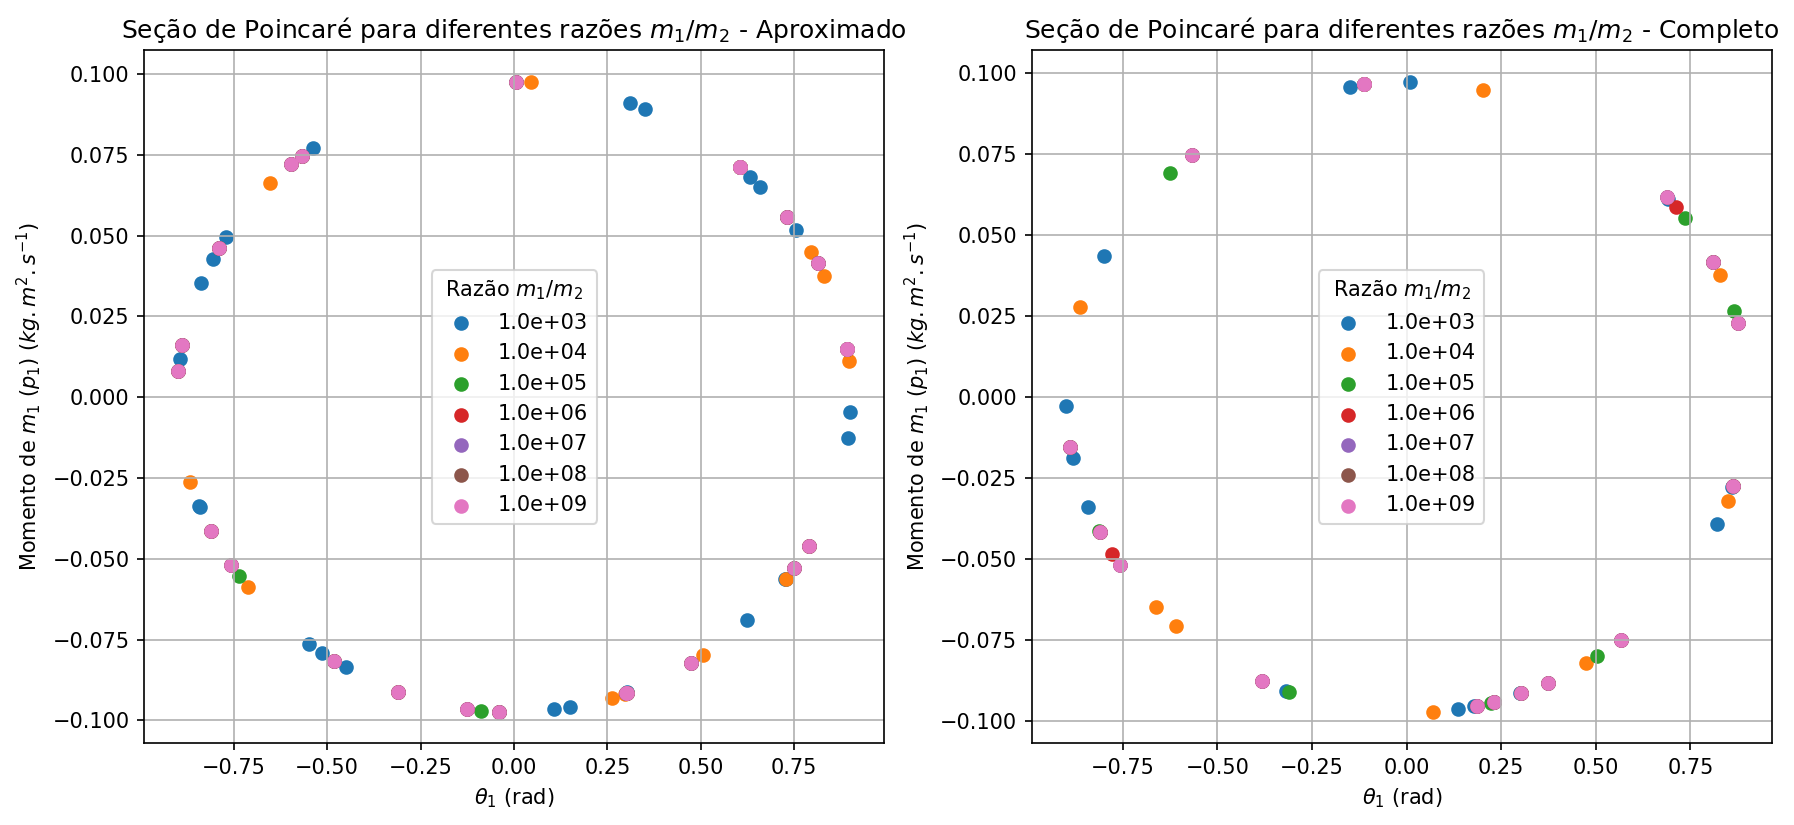

In [22]:
X_t_aprox_mvar = []
Sec_aprox_mvar = []
X_t_comp_mvar = []
Sec_comp_mvar = []
fig_mvar, ax_mvar = plt.subplots(1,2, figsize=(14, 6),dpi=150)
for v in range(7):
  m2 = 10**(-4-v)
  a, b = RK2(pendulo_aprox)
  c, d = RK2(pendulo_comp)
  a = np.transpose(a)
  b = np.transpose(b)
  c = np.transpose(c)
  d = np.transpose(d)
  X_t_aprox_mvar.append(a)
  Sec_aprox_mvar.append(b)
  X_t_comp_mvar.append(c)
  Sec_comp_mvar.append(d)
  ax_mvar[0].scatter(Sec_aprox_mvar[v][0], Sec_aprox_mvar[v][2], label=format(m1/m2,'.1e'))
  ax_mvar[0].set_title(r'Seção de Poincaré para diferentes razões $m_1/m_2$ - Aproximado')
  ax_mvar[0].set_xlabel(r'$\theta_{1}$ (rad)')
  ax_mvar[0].set_ylabel(r'Momento de $m_{1}$ ($p_{1}$) ($kg.m^{2}.s^{-1}$)')
  ax_mvar[0].grid()
  ax_mvar[0].legend(loc='best', title=r'Razão $m_1/m_2$')
  ax_mvar[1].scatter(Sec_comp_mvar[v][0], Sec_comp_mvar[v][2], label=format(m1/m2,'.1e'))
  ax_mvar[1].set_title(r'Seção de Poincaré para diferentes razões $m_1/m_2$ - Completo')
  ax_mvar[1].set_xlabel(r'$\theta_{1}$ (rad)')
  ax_mvar[1].set_ylabel(r'Momento de $m_{1}$ ($p_{1}$) ($kg.m^{2}.s^{-1}$)')
  ax_mvar[1].grid()
  ax_mvar[1].legend(loc='best', title=r'Razão $m_1/m_2$')

Plot the temporal evolution of the angular positions for different initial conditions, exact model.

X_t_comp_tvar: collection of the temporal evolution for each CI.

Sec_comp_tvar; collection of the Poincaré Sections for each CI.

The loop selects an index from the CIs list, naming them by the matrix *letters*.

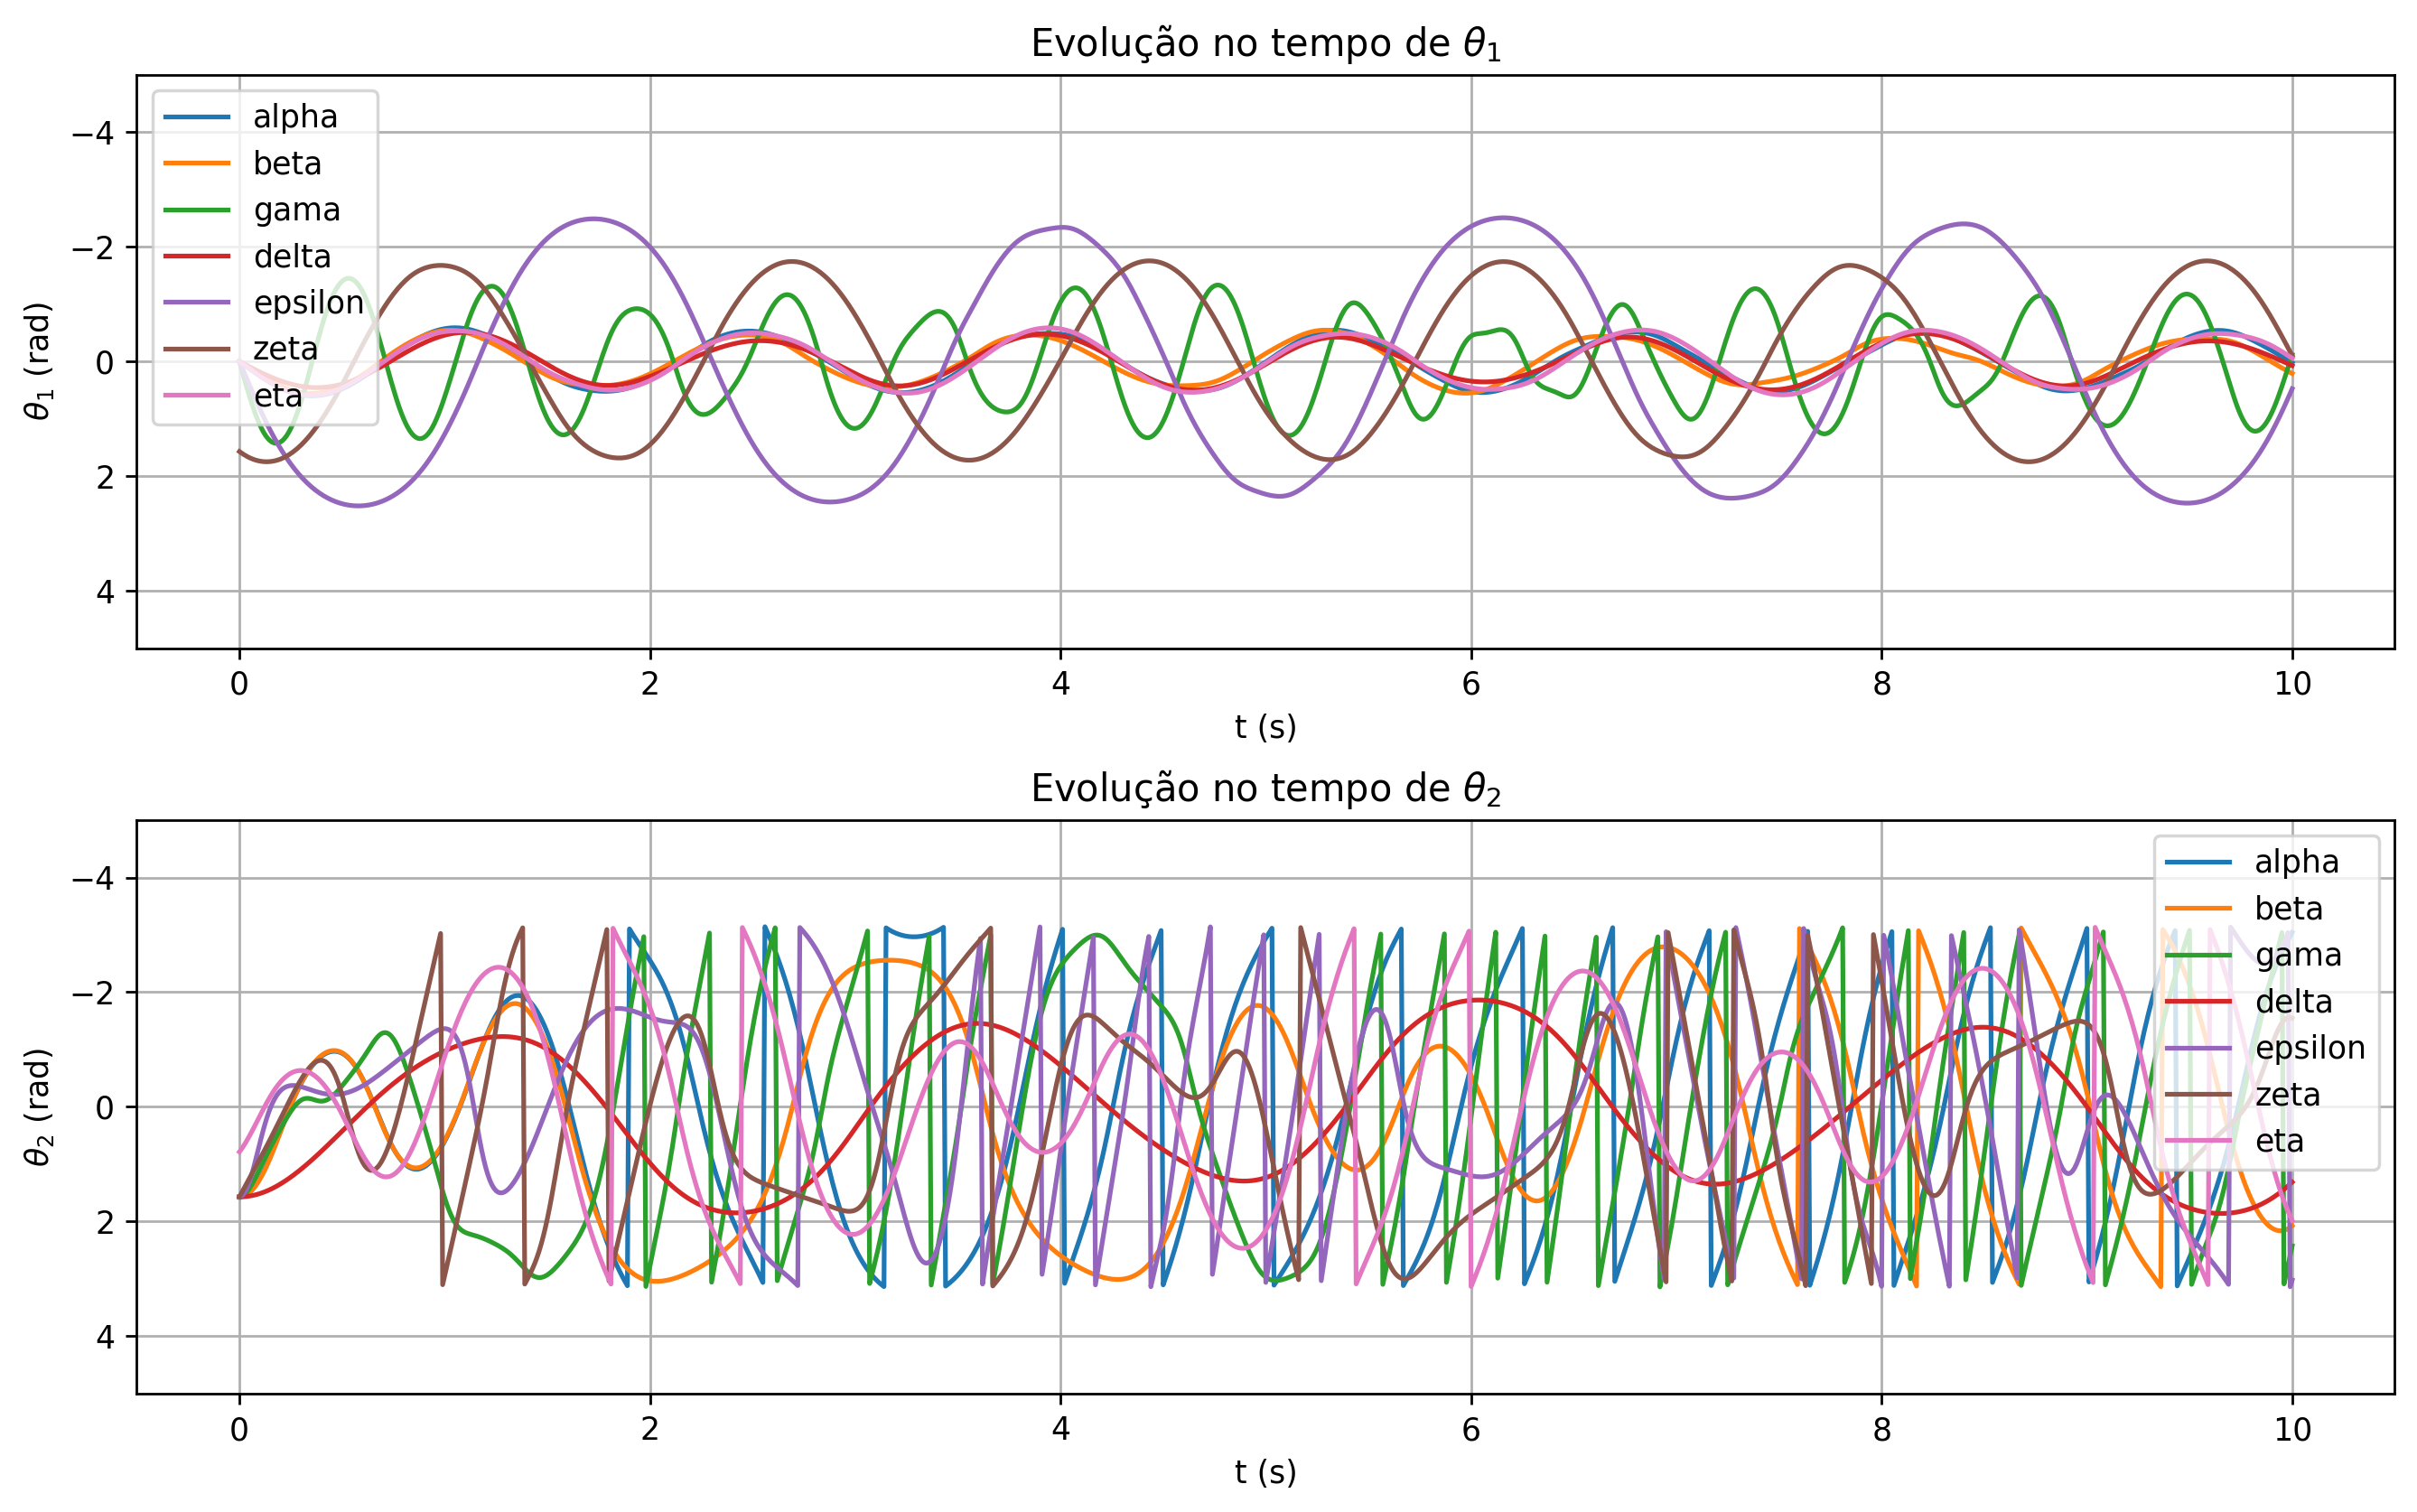

In [23]:
letters = np.array([r'alpha',r'beta',r'gama',r'delta',r'epsilon',r'zeta',r'eta',r'csi'])
X_t_comp_tvar = []
Sec_comp_tvar = []
m1_a = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
m2_a = np.array([0.005,0.01,0.005,0.005,0.005,0.005,0.005,0.005])
l1_a = np.array([0.5,0.5,0.1,0.5,0.5,0.5,0.5,0.5])
l2_a = np.array([0.2,0.2,0.2,1,0.2,0.2,0.2,0.2])
E_a = np.array([0.1,0.1,0.1,0.1,1,0.1,0.1,0.1])
theta1_0_a = np.array([0,0,0,0,0,np.pi/2,0,0])
theta2_0_a = np.array([np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi/4,np.pi/2])
theta2_p0_a = np.array([0,0,0,0,0,0,0,np.pi/4])
theta1_p0_a = np.sqrt(2*m1_a*(l1_a**2)*(E_a-m2_a*g*l2_a))
fig_tvar, ax_tvar = plt.subplots(2, figsize=(10, 8),dpi=250)
plt.subplots_adjust(left=0, right=1, top=1.0, bottom= 0.27, wspace= 0.15, hspace=0.3)
for v in range(len(m1_a)-1):
  m1 = m1_a[v]
  m2 = m2_a[v]
  l1 = l1_a[v]
  l2 = l2_a[v]
  E = E_a[v]
  theta1_0 = theta1_0_a[v]
  theta2_0 = theta2_0_a[v]
  theta2_p0 = theta2_p0_a[v]
  theta1_p0 = theta1_p0_a[v]
  c, d = RK2(pendulo_comp)
  c = np.transpose(c)
  d = np.transpose(d)
  X_t_comp_tvar.append(c)
  Sec_comp_tvar.append(d)
  ax_tvar[0].plot(np.arange(0.0,Tf+h,h), X_t_comp_tvar[v][0], label=letters[v])
  ax_tvar[0].set_title(r'Evolução no tempo de $\theta_1$')
  ax_tvar[0].set_xlabel(r't (s)')
  ax_tvar[0].set_ylabel(r'$\theta_{1}$ (rad)')
  ax_tvar[0].set_ylim(5,-5)
  ax_tvar[0].grid()
  ax_tvar[0].legend(loc='best')
  ax_tvar[1].plot(np.arange(0.0,Tf+h,h), X_t_comp_tvar[v][1], label=letters[v])
  ax_tvar[1].set_title(r'Evolução no tempo de $\theta_2$')
  ax_tvar[1].set_xlabel(r't (s)')
  ax_tvar[1].set_ylabel(r'$\theta_{2}$ (rad)')
  ax_tvar[1].set_ylim(5,-5)
  ax_tvar[1].grid()
  ax_tvar[1].legend(loc='best')

Plot the temporal evolution of the angular positions, exact model. The timestep for the Runge-Kutta method is changed in each iteraction.

X_t_com_hvar: collection of the solutions for each timestep size *h*.

Sec_comp_hvar: collection of the Poincaré Sections for each timestep size *h*.

Here the loop on *v* changes the timestep size directly for each simulation.

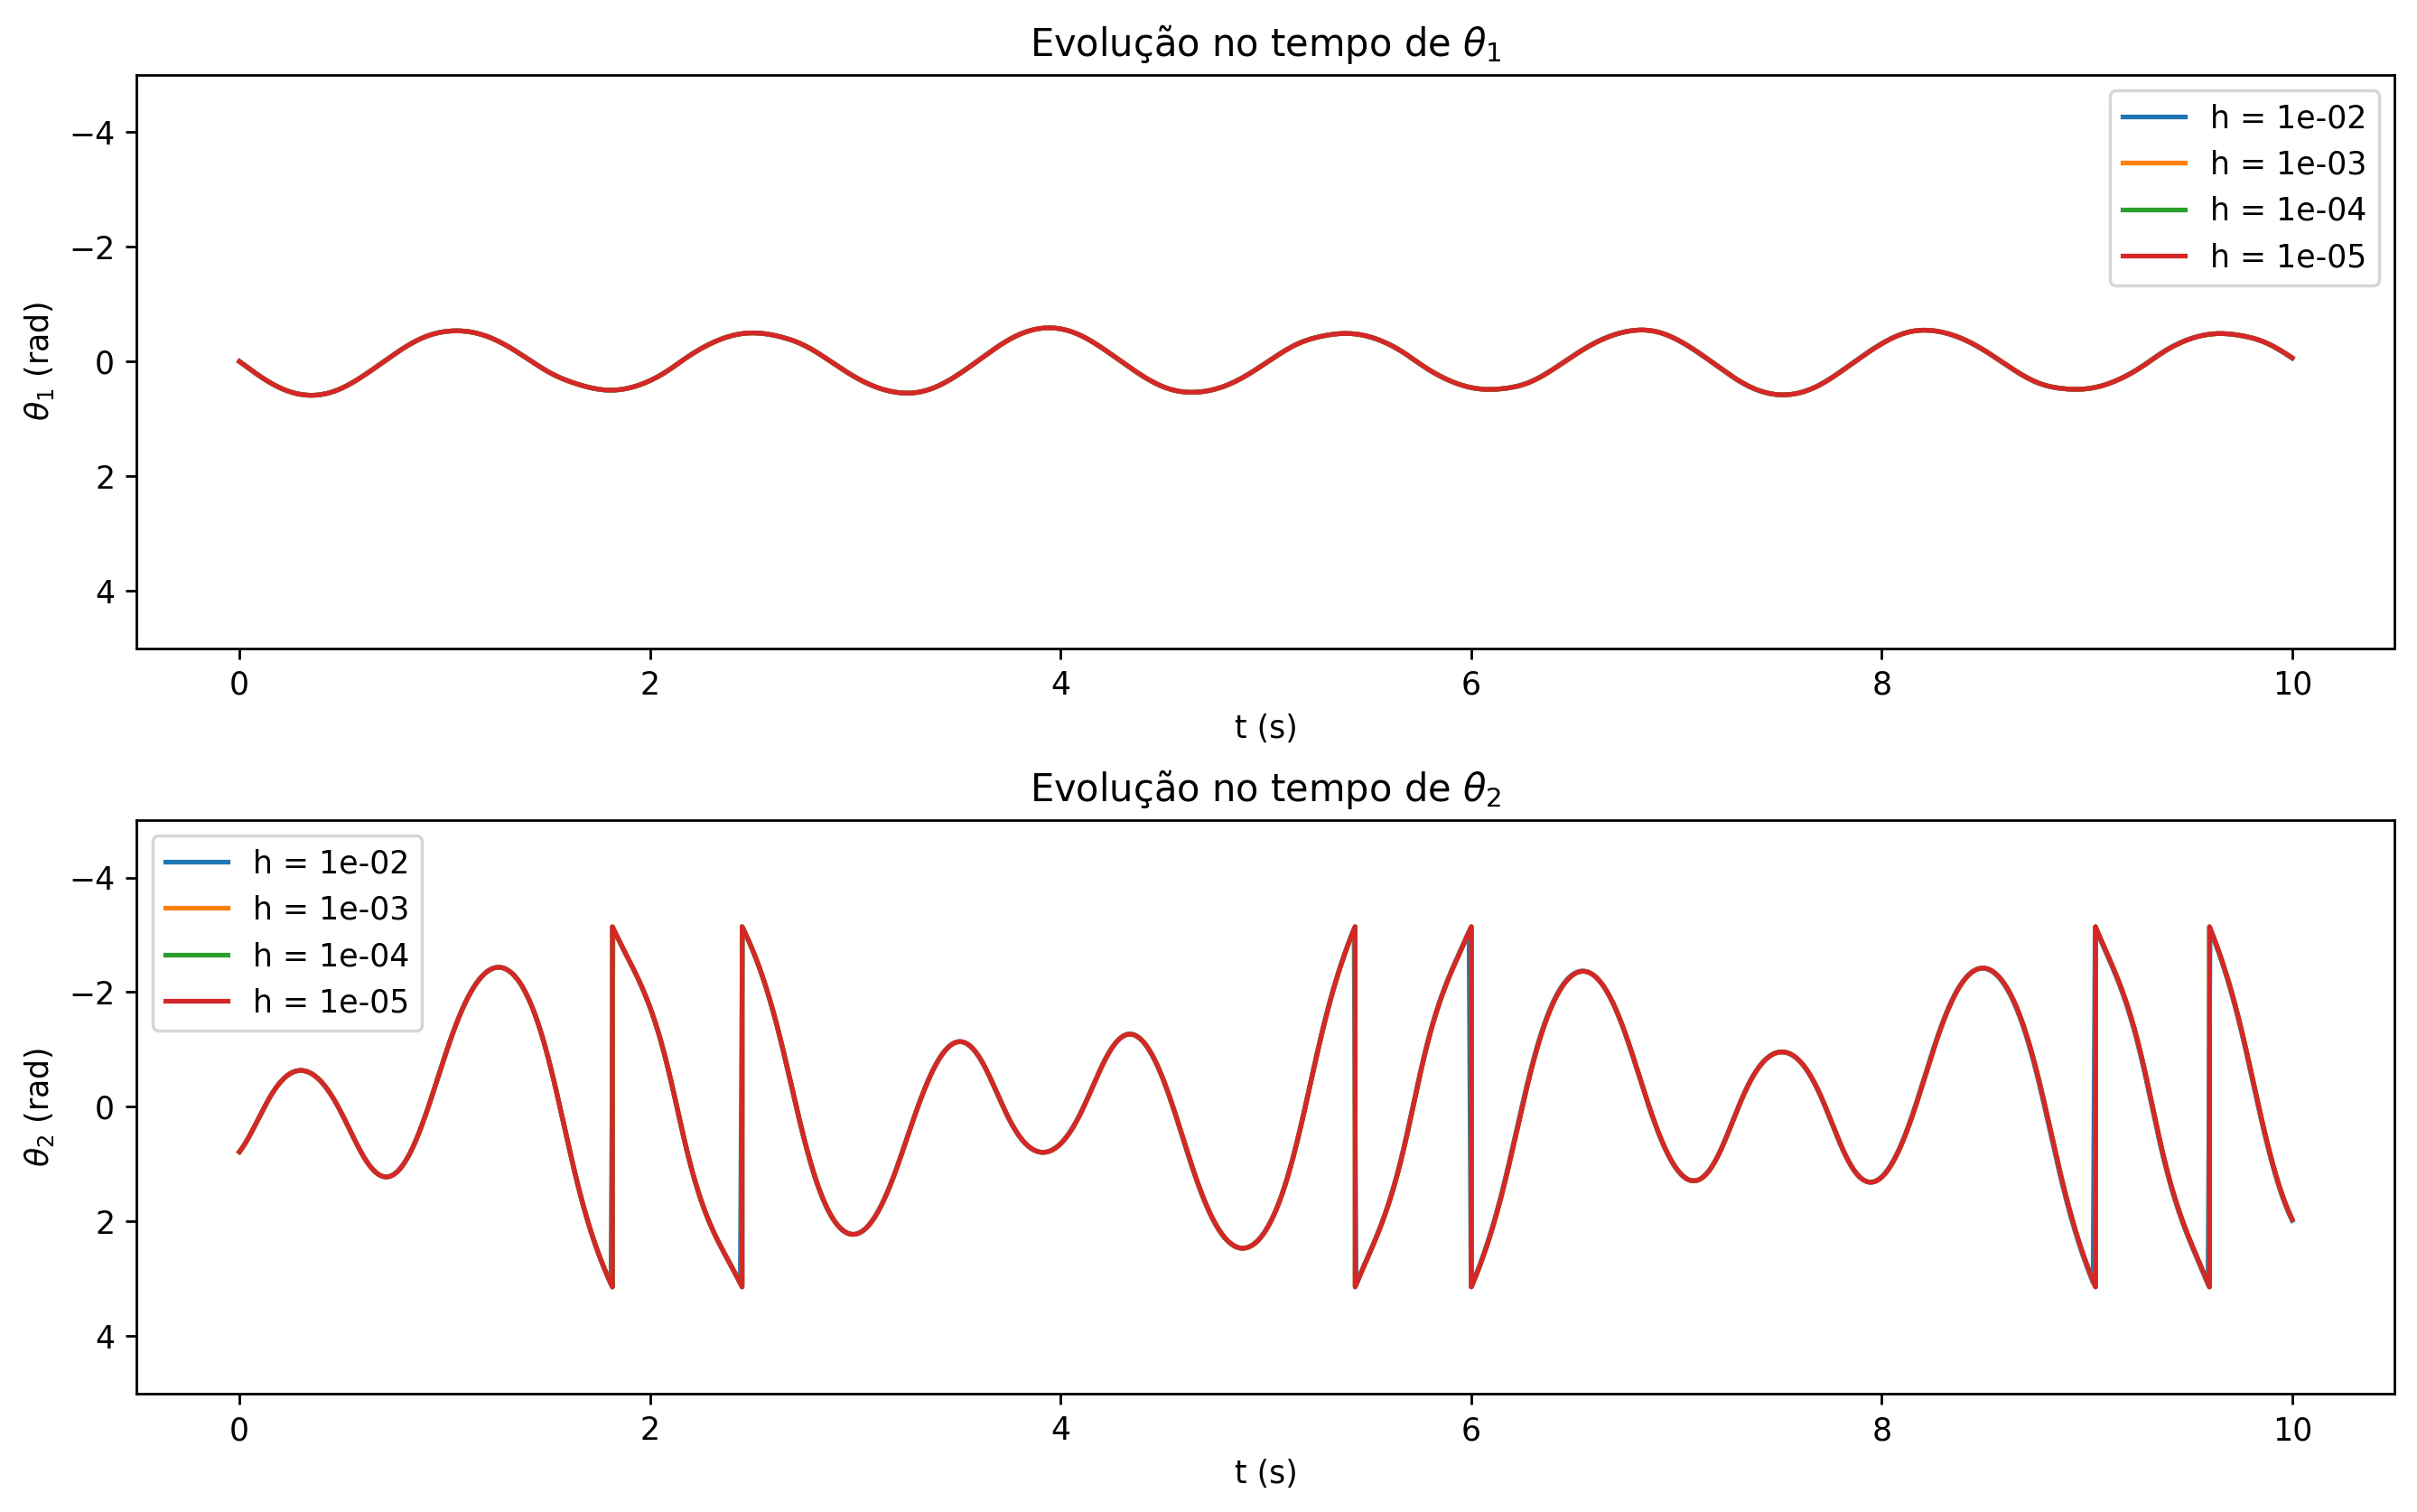

In [24]:
letters = np.array([r'alpha',r'beta',r'gama',r'delta',r'epsilon',r'zeta',r'eta',r'csi'])
X_t_comp_hvar = []
Sec_comp_hvar = []
fig_hvar, ax_hvar = plt.subplots(2, figsize=(10, 8),dpi=250)
plt.subplots_adjust(left=0, right=1, top=1.0, bottom= 0.27, wspace= 0.15, hspace=0.3)
for v in range(len(letters)-4):
  h = 10**(-v-2)
  Nt = np.size(np.arange(0.0,Tf+h,h))
  c, d = RK2(pendulo_comp)
  c = np.transpose(c)
  d = np.transpose(d)
  X_t_comp_hvar.append(c)
  Sec_comp_hvar.append(d)
  ax_hvar[0].plot(np.arange(0.0,Tf+h,h), X_t_comp_hvar[v][0], label='h = '+str(format(h,'.0e')))
  ax_hvar[0].set_title(r'Evolução no tempo de $\theta_1$')
  ax_hvar[0].set_xlabel(r't (s)')
  ax_hvar[0].set_ylabel(r'$\theta_{1}$ (rad)')
  ax_hvar[0].set_ylim(5,-5)
  ax_hvar[0].grid()
  ax_hvar[0].legend(loc='best')
  ax_hvar[1].plot(np.arange(0.0,Tf+h,h), X_t_comp_hvar[v][1], label='h = '+str(format(h,'.0e')))
  ax_hvar[1].set_title(r'Evolução no tempo de $\theta_2$')
  ax_hvar[1].set_xlabel(r't (s)')
  ax_hvar[1].set_ylabel(r'$\theta_{2}$ (rad)')
  ax_hvar[1].set_ylim(5,-5)
  ax_hvar[1].grid()
  ax_hvar[1].legend(loc='best')